# P-value

La probabilidad de que ocurra un evento de forma al azar, tomando una premisa como cierta.

- probabilidad: valor entre 0 y 1.
- evento al azar: Escenario libre de condiciones.
- premisa/hipótesis nula: Una hipótesis que consideramos verdadera al comienzo.

Premisa/HN: La persona está usando una moneda común.

Hipótesis Alterna: La persona está usando una moneda de truco.

Evento: Todos los resultados salgan cara

## Primer Lanzamiento
**¿Cuál es la probabilidad de que salga cara? - 0.5**

## Segundo Lanzamiento
C-C | C-S | S-C | S-S |
**¿Cuál es la probabilidad de que salga dos veces cara? - 0.25**

**...**

N.Lanzamientos | Número de Resultados | Probabilidad de que salga C
      1        |           2          |           0.5
      2        |           4          |           0.25
      3        |           8          |           0.125
      4        |           16         |           0.06
      5        |           32         |           0.03
                            .
                            .
                            .

Conclusión: Cada vez será más raro que salga cara...

**Premisa/HN: La persona está usando una moneda común.**

**Hipótesis Alterna: La persona está usando una moneda de truco.**

alpha = 0.05

Si el p-value es mayor que 0.05, la persona es inocente, la moneda es justa, NO se rechaza la Hipótesis Nula.

Sin embargo, si el p-value es menor que 0.05, decimos que la persona es culpable y la moneda tiene truco, RECHAZAMOS la hipótesis nula.

## Ejemplo para Memory Complaints

HN = Que el coeficiente es 0. No tiene efecto en el Diagnóstico.
HA = MemoryComplaints TIENE efecto en el Diagnóstico.

p-value = 0.0001

p-value < 0.05 -> Tiene un efecto SIGNIFICATIVO en el diagnóstico.


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("/content/alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


**Tipos de datos**

In [3]:
df.dtypes

,0
PatientID,int64
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64


In [7]:
df.dtypes.value_counts()

,count
int64,22
float64,12
object,1


**Nulos**

In [8]:
df.isnull().any()

,0
PatientID,False
Age,False
Gender,False
Ethnicity,False
EducationLevel,False
BMI,False
Smoking,False
AlcoholConsumption,False
PhysicalActivity,False
DietQuality,False


In [9]:
df.Diagnosis.value_counts()

,count
Diagnosis,
0,1389
1,760


## Eliminamos Columnas

In [ ]:
df.columns

In [ ]:
df_alzheimer = df.drop(columns=['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel','DoctorInCharge'])
df_alzheimer.columns

In [16]:
df_alzheimer = df[[
    "FamilyHistoryAlzheimers",
    "MemoryComplaints",
    "BehavioralProblems",
    "Confusion",
    "Disorientation",
    "DifficultyCompletingTasks",
    "Forgetfulness",
    "Diagnosis"]]
df_alzheimer

,FamilyHistoryAlzheimers,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2144,0,0,0,1,0,0,0,1
2145,0,0,1,0,0,0,0,1
2146,0,0,0,0,0,0,0,1
2147,0,0,0,0,0,0,1,1


## Correlaciones

In [61]:
df_alzheimer.corr()

,FamilyHistoryAlzheimers,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,DifficultyCompletingTasks,Forgetfulness,Diagnosis
FamilyHistoryAlzheimers,1.000000,-0.028348,-0.023558,0.017976,0.035963,0.008787,0.022339,-0.032900
MemoryComplaints,-0.028348,1.000000,-0.009765,-0.007749,0.013442,0.044151,-0.006961,0.306742
BehavioralProblems,-0.023558,-0.009765,1.000000,-0.022676,-0.022154,-0.019174,0.023374,0.224350
Confusion,0.017976,-0.007749,-0.022676,1.000000,0.007034,-0.022003,0.010100,-0.019186
Disorientation,0.035963,0.013442,-0.022154,0.007034,1.000000,-0.020767,-0.032013,-0.024648
DifficultyCompletingTasks,0.008787,0.044151,-0.019174,-0.022003,-0.020767,1.000000,-0.013386,0.009069
Forgetfulness,0.022339,-0.006961,0.023374,0.010100,-0.032013,-0.013386,1.000000,-0.000354
Diagnosis,-0.032900,0.306742,0.224350,-0.019186,-0.024648,0.009069,-0.000354,1.000000


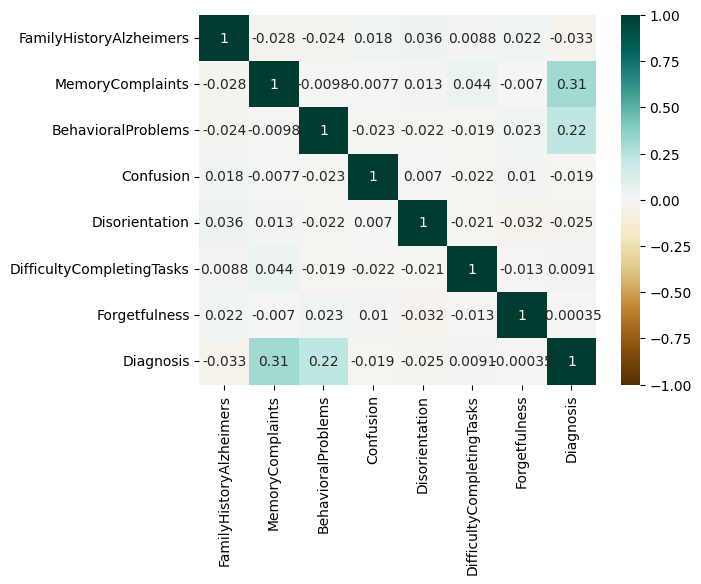

In [62]:
sns.heatmap(
    data=df_alzheimer.corr(),
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    annot=True
)
plt.show()

## Regresión Logística

In [63]:
smf.logit(
data=df_alzheimer,
formula= "Diagnosis ~ FamilyHistoryAlzheimers + MemoryComplaints + BehavioralProblems + Confusion + Disorientation + DifficultyCompletingTasks + Forgetfulness"
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.576610
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                            7
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.1125
Time:                        02:23:26   Log-Likelihood:                -1239.1
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 6.026e-64
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.1407      0.084    -13.548      0.000      -1.306      -0.976
FamilyHistoryAlzheimers      -0.1012      0.114     -0.890      0.373      -0.324       0.122
MemoryComplaints              1.6250      0.116     13.980      0.000       1.397       1.853
BehavioralProblems            1.3642      0.129     10.601      0.000       1.112       1.616
Confusion                    -0.0675      0.122     -0.553      0.580      -0.307       0.172
Disorientation               -0.1572      0.137     -1.151      0.250      -0.425       0.110
DifficultyCompletingTasks    -0.0029      0.134     -0.022      0.983      -0.266       0.260
Forgetfulness                -0.0232      0.106     -0.218      0.828      -0.232       0.185
=============================================================================================
"""

In [64]:
model_diag = smf.logit(
    data=df_alzheimer,
    formula="Diagnosis ~ MemoryComplaints + BehavioralProblems"
).fit()
model_diag.summary()

Optimization terminated successfully.
         Current function value: 0.577211
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2146
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.1115
Time:                        02:23:30   Log-Likelihood:                -1240.4
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 2.324e-68
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.2123      0.062    -19.542      0.000      -1.334      -1.091
MemoryComplaints       1.6248      0.116     14.008      0.000       1.397       1.852
BehavioralProblems     1.3703      0.128     10.667      0.000       1.119       1.622
======================================================================================
"""

In [65]:
alzheimer_predictions = pd.DataFrame(
    dict(
        actual_value = df_alzheimer.Diagnosis,
        predicted_value = model_diag.predict().round()
    )
)
alzheimer_predictions

,actual_value,predicted_value
0,0,0.0
1,0,0.0
2,0,0.0
3,0,1.0
4,0,0.0
...,...,...
2144,1,0.0
2145,1,1.0
2146,1,0.0
2147,1,0.0


In [66]:
(
    alzheimer_predictions
    .value_counts()
    .reset_index()
)

,actual_value,predicted_value,count
0,0,0.0,1105
1,1,1.0,433
2,1,0.0,327
3,0,1.0,284


# Matriz de Confusión

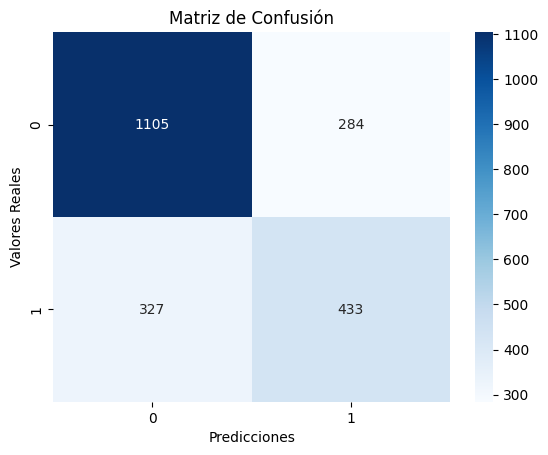

In [67]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(alzheimer_predictions["actual_value"], alzheimer_predictions["predicted_value"])

sns.heatmap(data=conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

## Exactitud (Accuracy)

Mide el porcentaje total de predicciones correctas.

* Verdaderos Positivos (TP 1-1): Casos correctamente clasificados como la clase positiva.
* Verdaderos Negativos (TN 0-0): Casos correctamente clasificados como la clase negativa.
* Falsos Positivos (FP 0-1): Casos incorrectamente clasificados como positivos cuando son en realidad negativos.
* Falsos Negativos (FN 1-0): Casos incorrectamente clasificados como negativos cuando son en realidad positivos.

In [68]:
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

(TP + TN)/(TP+TN+FP+FN)

0.7156817124243834

In [69]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(alzheimer_predictions["actual_value"], alzheimer_predictions["predicted_value"])
acc_score = np.round(acc_score,2)*100

print(f"El modelo tiene una exactitud del {acc_score}%")

El modelo tiene una exactitud del 72.0%
